In [530]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [531]:
dataFrame=pd.read_csv("/home/hrugvedb/Desktop/hrugved/dataset/Telco_customer_churn.csv")
dataFrame


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [626]:
df['ChurnValue'].value_counts()

0    5174
1    1869
Name: ChurnValue, dtype: int64

In [532]:
df=dataFrame.copy()

In [533]:
df

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [535]:
# df["Latitude"]*10000


In [536]:
# df["Longitude"]*10000


In [537]:
# df["Longitude"]*10000000


In [538]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [539]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [540]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [541]:
df['SeniorCitizen']=df['SeniorCitizen'].map({'Yes':1,'No':0})

In [542]:
df.drop(['LatLong'],axis=1,inplace=True)

In [543]:
df.drop(['ChurnReason'],axis=1,inplace=True)

In [544]:
df['MonthlyCharges']=df['MonthlyCharges'].astype(int)

In [545]:
df['Latitude'] = (df['Latitude'] * 10000).round().astype(int)

In [546]:
df['Longitude'] = (df['Longitude'] * 10000).round().astype(int)

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        7043 non-null   object
 1   Count             7043 non-null   int64 
 2   Country           7043 non-null   object
 3   State             7043 non-null   object
 4   City              7043 non-null   object
 5   ZipCode           7043 non-null   int64 
 6   Latitude          7043 non-null   int64 
 7   Longitude         7043 non-null   int64 
 8   Gender            7043 non-null   object
 9   SeniorCitizen     7043 non-null   int64 
 10  Partner           7043 non-null   int64 
 11  Dependents        7043 non-null   int64 
 12  TenureMonths      7043 non-null   int64 
 13  PhoneService      7043 non-null   int64 
 14  MultipleLines     7043 non-null   object
 15  InternetService   7043 non-null   object
 16  OnlineSecurity    7043 non-null   object
 17  OnlineBackup  

In [548]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})


In [549]:
df.drop(['Country'],axis=1,inplace=True)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        7043 non-null   object
 1   Count             7043 non-null   int64 
 2   State             7043 non-null   object
 3   City              7043 non-null   object
 4   ZipCode           7043 non-null   int64 
 5   Latitude          7043 non-null   int64 
 6   Longitude         7043 non-null   int64 
 7   Gender            7043 non-null   int64 
 8   SeniorCitizen     7043 non-null   int64 
 9   Partner           7043 non-null   int64 
 10  Dependents        7043 non-null   int64 
 11  TenureMonths      7043 non-null   int64 
 12  PhoneService      7043 non-null   int64 
 13  MultipleLines     7043 non-null   object
 14  InternetService   7043 non-null   object
 15  OnlineSecurity    7043 non-null   object
 16  OnlineBackup      7043 non-null   object
 17  DeviceProtecti

In [551]:
df = pd.get_dummies(df, columns=['TechSupport'])

In [552]:
df = pd.get_dummies(df, columns=['MultipleLines'])

In [553]:
df = pd.get_dummies(df, columns=['InternetService'])

In [554]:
df = pd.get_dummies(df, columns=['OnlineSecurity'])

In [555]:
df = pd.get_dummies(df, columns=['OnlineBackup'])

In [556]:
df = pd.get_dummies(df, columns=['DeviceProtection'])

In [557]:
df = pd.get_dummies(df, columns=['StreamingTV'])

In [558]:
df = pd.get_dummies(df, columns=['Streaming Movies'])

In [559]:
df = pd.get_dummies(df, columns=['Contract'])

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   object
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [561]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder to the categorical column
le.fit(df['City'])

# Transform the categorical column
df['City'] = le.transform(df['City'])

In [562]:
le.fit(df['PaymentMethod'])

# Transform the categorical column
df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [563]:
le.fit(df['TotalCharges'])

# Transform the categorical column
df['TotalCharges'] = le.transform(df['TotalCharges'])

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   int64 
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [565]:
df['ChurnLabel']=df['ChurnLabel'].map({'Yes':1,'No':0})

In [566]:
df['ChurnLabel']

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: ChurnLabel, Length: 7043, dtype: int64

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   int64 
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [568]:
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   CustomerID                            7043 non-null   object
 1   Count                                 7043 non-null   int64 
 2   State                                 7043 non-null   object
 3   City                                  7043 non-null   int64 
 4   ZipCode                               7043 non-null   int64 
 5   Latitude                              7043 non-null   int64 
 6   Longitude                             7043 non-null   int64 
 7   Gender                                7043 non-null   int64 
 8   SeniorCitizen                         7043 non-null   int64 
 9   Partner                               7043 non-null   int64 
 10  Dependents                            7043 non-null   int64 
 11  TenureMonths                  

In [570]:
df.drop(['CustomerID','State','Count'],axis=1,inplace=True)

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   City                                  7043 non-null   int64
 1   ZipCode                               7043 non-null   int64
 2   Latitude                              7043 non-null   int64
 3   Longitude                             7043 non-null   int64
 4   Gender                                7043 non-null   int64
 5   SeniorCitizen                         7043 non-null   int64
 6   Partner                               7043 non-null   int64
 7   Dependents                            7043 non-null   int64
 8   TenureMonths                          7043 non-null   int64
 9   PhoneService                          7043 non-null   int64
 10  PaperlessBilling                      7043 non-null   int64
 11  PaymentMethod                         7043 

In [572]:
df.drop(['ChurnLabel'],axis=1,inplace=True)

In [573]:
df.drop(['ZipCode'],axis=1,inplace=True)

In [574]:
y=df['ChurnValue']
X=df.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=0)

In [575]:
import joblib
rfc=RandomForestClassifier(n_estimators=10,random_state=0)

rfc.fit(X_train,y_train)


joblib.dump(rfc, 'rfc_model.pkl')
y_pred=rfc.predict(X_test)

In [576]:
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

In [577]:
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.93

the classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1806
           1       0.90      0.81      0.86       660

    accuracy                           0.93      2466
   macro avg       0.92      0.89      0.90      2466
weighted avg       0.93      0.93      0.93      2466



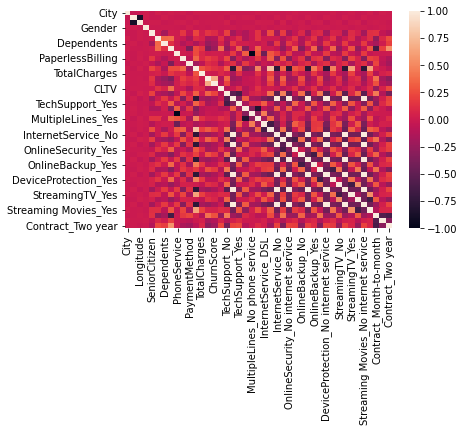

In [578]:
corr=df.corr()
mapp=sns.heatmap(corr)

In [579]:
df2=df.copy()

In [580]:
#df2.drop(['ZipCode'],axis=1,inplace=True)

In [581]:
#df2.drop(['ChurnLabel'],axis=1,inplace=True)

In [582]:
y=df2['ChurnValue']
X=df2.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=0)

In [583]:
import joblib
rfc=RandomForestClassifier(n_estimators=6,random_state=0)

rfc.fit(X_train,y_train)


joblib.dump(rfc, 'rfc.pkl')
y_pred=rfc.predict(X_test)

In [584]:
X_test

,City,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,PaperlessBilling,...,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
2200,93,340597,-1173910,0,1,0,0,49,1,0,...,0,0,0,1,0,0,1,1,0,0
4627,55,352895,-1160922,1,0,0,0,24,1,0,...,0,0,1,0,0,1,0,0,1,0
3225,371,341533,-1182630,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
2828,1088,397244,-1237676,0,1,0,0,20,1,0,...,0,0,0,1,1,0,0,1,0,0
3768,872,378018,-1224023,0,0,1,1,13,1,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,655,328309,-1164446,0,0,0,0,59,1,0,...,0,1,0,0,0,0,1,0,1,0
4109,434,383753,-1215079,1,0,0,0,17,1,0,...,0,0,1,0,0,1,0,0,0,1
4106,339,390319,-1208111,1,0,0,1,9,1,0,...,0,0,1,0,0,1,0,1,0,0
2760,544,373620,-1207484,0,0,0,0,12,1,1,...,0,1,0,0,1,0,0,1,0,0


In [585]:
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.92

the classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1806
           1       0.91      0.76      0.83       660

    accuracy                           0.92      2466
   macro avg       0.92      0.87      0.89      2466
weighted avg       0.92      0.92      0.91      2466



In [586]:
X_test.to_csv('/home/hrugvedb/Desktop/xtest.csv')

In [587]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   City                                  7043 non-null   int64
 1   Latitude                              7043 non-null   int64
 2   Longitude                             7043 non-null   int64
 3   Gender                                7043 non-null   int64
 4   SeniorCitizen                         7043 non-null   int64
 5   Partner                               7043 non-null   int64
 6   Dependents                            7043 non-null   int64
 7   TenureMonths                          7043 non-null   int64
 8   PhoneService                          7043 non-null   int64
 9   PaperlessBilling                      7043 non-null   int64
 10  PaymentMethod                         7043 non-null   int64
 11  MonthlyCharges                        7043 

In [588]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1759   47]
 [ 159  501]]


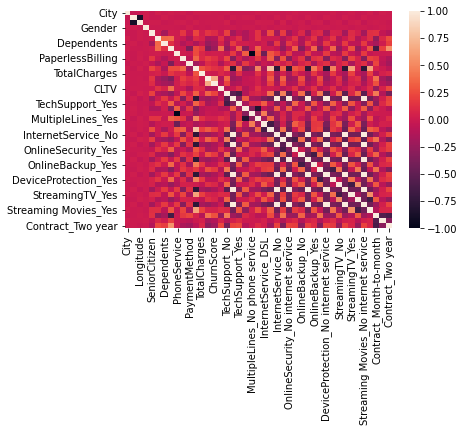

In [589]:
corr=df2.corr()
mapp=sns.heatmap(corr)

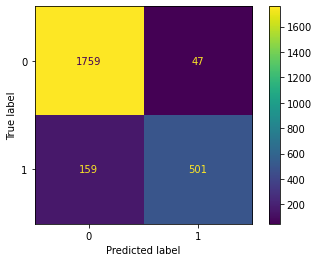

In [590]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

In [591]:
df2.to_csv('/home/hrugvedb/Desktop/data.csv')


In [627]:
df3=pd.read_csv('/home/hrugvedb/Desktop/testing.csv')

In [614]:
data= {
    'City': 93,
    'Latitude': 340597,
    'Longitude': -1173910,
    'Gender': 0,
    'SeniorCitizen': 1,
    'Partner': 0,
    'Dependents': 0,
    'TenureMonths': 49,
    'PhoneService': 1,
    'PaperlessBilling': 0,
    'PaymentMethod': 1,
    'MonthlyCharges': 101,
    'TotalCharges': 4290,
    'ChurnScore': 22,
    'CLTV': 5348,
    'TechSupport_No': 1,
    'TechSupport_No internet service': 0,
    'TechSupport_Yes': 0,
    'MultipleLines_No': 0,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 1,
    'InternetService_DSL': 0,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'OnlineSecurity_No': 1,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0,
    'OnlineBackup_No': 0,
    'OnlineBackup_No internet service': 0,
    'OnlineBackup_Yes': 1,
    'DeviceProtection_No': 1,
    'DeviceProtection_No internet service': 0,
    'DeviceProtection_Yes': 0,
    'StreamingTV_No': 0,
    'StreamingTV_No internet service': 0,
    'StreamingTV_Yes': 1,
    'Streaming Movies_No': 1,
    'Streaming Movies_No internet service': 0,
    'Streaming Movies_Yes': 0,
    'Contract_Month-to-month': 1,
    'Contract_One year': 0,
    'Contract_Two year': 0
}

print(data)
df4 = pd.DataFrame(data_dict, index=[0])

df4

{'City': 93, 'Latitude': 340597, 'Longitude': -1173910, 'Gender': 0, 'SeniorCitizen': 1, 'Partner': 0, 'Dependents': 0, 'TenureMonths': 49, 'PhoneService': 1, 'PaperlessBilling': 0, 'PaymentMethod': 1, 'MonthlyCharges': 101, 'TotalCharges': 4290, 'ChurnScore': 22, 'CLTV': 5348, 'TechSupport_No': 1, 'TechSupport_No internet service': 0, 'TechSupport_Yes': 0, 'MultipleLines_No': 0, 'MultipleLines_No phone service': 0, 'MultipleLines_Yes': 1, 'InternetService_DSL': 0, 'InternetService_Fiber optic': 1, 'InternetService_No': 0, 'OnlineSecurity_No': 1, 'OnlineSecurity_No internet service': 0, 'OnlineSecurity_Yes': 0, 'OnlineBackup_No': 0, 'OnlineBackup_No internet service': 0, 'OnlineBackup_Yes': 1, 'DeviceProtection_No': 1, 'DeviceProtection_No internet service': 0, 'DeviceProtection_Yes': 0, 'StreamingTV_No': 0, 'StreamingTV_No internet service': 0, 'StreamingTV_Yes': 1, 'Streaming Movies_No': 1, 'Streaming Movies_No internet service': 0, 'Streaming Movies_Yes': 0, 'Contract_Month-to-month

,City,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,PaperlessBilling,...,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,93,340597,-1173910,0,1,0,0,49,1,0,...,0,0,0,1,1,0,0,1,0,0


In [628]:
rfc=RandomForestClassifier(n_estimators=6,random_state=42)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(df3)
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

ValueError: Found array with 0 sample(s) (shape=(0, 42)) while a minimum of 1 is required.

In [621]:
rfc = joblib.load('rfc.pkl')

y_pred = rfc.predict(df4)

accu = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [2466, 1]

In [597]:
X_train.columns

Index(['City', 'Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'ChurnScore', 'CLTV',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'Streaming Movies_No', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Cont

In [598]:
df3.columns

Index(['Unnamed: 0', 'City', 'Latitude', 'Longitude', 'Gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths',
       'PhoneService', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'ChurnScore', 'CLTV', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'Streaming Movies_No', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_On

In [617]:
df4.shape


(1, 42)

In [618]:
X_test.shape

(2466, 42)